# Case Study 2

#### Dhruba Dey, Josh Eysenbach, Anish Patel, Sreeni Prabhala
#### May 24, 2021

### Abstract

This case study involves an analysis of a ten year study tracking diabetic patient readmission into hospitals. The goal of the analysis is to predict when diabetic patients are likely to be readmitted to a hospital based on the available data and determine if any the provided factors are particularly indicative of a high chance of readmission.

### 1   Introduction

Diabetes is a common disease that affects the body's ability to naturally regulate blood sugar levels. According to the American Heart Association [1], there are two main types of diabetes, both of which involve issues with insulin, a hormone which regulates how cells to absorb glucose from the bloodstream. Type 1 diabetes describes the chronic form that is usually identified at a young age in which the body is unable to produce sufficient insulin. Type 2 diabetes, the most common form, can arise later in life and occurs when the body develops an "insulin resistance" or its insulin production begins to diminish. 

Complications involving the effects of diabetes on the heart and circulatory system can lead to dire conditions that require hospitalization. Often patients are released from the hospital but have to be readmitted soon after with recurring issues, causing additional strain on the both the patients' livelihoods and the efficiency of the hospital. The data provided for this case study is requisitioned from a ten year study on hospital readmissions of diabetic patients. The goal of this analysis is to predict when diabetic patients are likely to be readmitted to the hospital after a visit given the provided information, and if that re-admission will occur in less than 30 days. Based on a predictive model, the most influential indicators of probable readmissions can be identified so that medical professionals can make better judgements on whether a diabetic patient is ready to be released. Since diabetes is estimated to affect 463 million people worldwide [2], any improvement in this regard would have far-reaching significant benefits.

### 2   Methods

The objective of our analysis is to identify the diabetes patients who have the highest risk of being re-admitted to the hospital within 30 days. The dataset is based on the multi-year study of these diabetes patients and each row represents an individual hospital admission. The patients’ information is systematically collected from the point of entry to that of discharge and can be broadly classified into a few categories such as the personal information, the admission situations and conditions, the laboratory tests conducted, the physician’s diagnosis, the treatments and medications, and the discharge condition. These data generate 50 features including the readmission information, which is the response variable. 

*Missing Values*

The first challenge encountered with this data is the missing values in these following features: 
(The number given adjacent to each feature denotes the missing values)
1.	weight: 98569 
2.	medical specialty: 49949
3.	payer code: 40256
4.	race: 2273
5.	diag_1: 1332
6.	diag_2: 358
7.	diag_3: 21

First, we want to investigate whether these missing values have any internal correlation or dependency. The heatmap alludes that the missing values do not overlap.

For diagnosis codes, the columns *diag_1*, *diag_2*, and *diag_3* appear numeric (perhaps even continuous) but are actually distinct codes that represent specific diagnoses and have no oridinal quality. There are quite a number of different diagnosis codes in these columns (e.g., diag_1 has 700+ different codes). These many number of distinct values are not manageable in their entirety for a Logistic Regression model in the short time available to us. As such, we have used the approach to assess the diagnosis codes that seem statistically significant for assessing readmission, retained those codes as-is, and have set the rest of them to a default value. This approach has addressed the missing values, as well as resulted in a set of 12 different important values in each of these columns which is much more manageable.

In case of weight, 96.85% values are missing; although we would hypothesize that this information is likely important metric for diabetic patients, filling that many missing values heuristically may distort the outcome of the model. Therefore, we decided to drop the weight feature. 

Based on research on the data, we believe that medical specialty, payer code, age, time-in-hospital, and admission-type-id have some similarity, and we want to find the cosine similarity among these features to fill the missing values.

The payer code has the highest correlation with age. Besides that, the payer code, which is basically the patient’s insurance, is driven by the age. The seniors tend to have a different set of insurances from the middle-aged people. The college students and the high school students have different insurance from other age groups. Therefore, we used the age groups and its mode to fill up the missing values in the payer code. 

Admission type is a good correlation with the medical specialty, but the medical specialty is completely missing for admission type 7.  Therefore, we have the missing values of medical specialty using its top four values in the randomized way. 

The race variable is identified as a potential ethical concern and sensitive discussion topic and we have decided to fill the missing values of race by picking randomly from other race values, as the randomization is a blind process and does not discriminate. The number of missing information for race is realtively low, so there should not have to be much concern for inadvertently creating any artificial trends in the model.

*Other Data Cleanup*

After tackling the missing values, we made some modifications to clean up the data. The age is converted to a single numerical value from the group that oridnally represents increasing age categories, and the readmission days are aligned using the binary condition – below or above 30 days. Features that are not meaningful such as encounter_id, patient_nbr, examide,  and citoglipton are removed from the analysis. THe categorical features are then one-hot encoded to produce binary features for each category.

*Logistic Regression Modeling*

The response variable is a bit unbalanced with 89 – 11 splits. So, we prefer to use the Stratified-Kfold instead of Kfold cross validation to randomize the selection of test data from the sample. Then, we have used L1 regularization with “Liblinear” optimization, which is suitable for small scale, and non-sparse datasets.  The purpose of L1 regularization is to reduce the number of features, keeping the accuracy high. Though we know accuracy is not the driving factor, as we need to manage the precision and the recall trade-off at the end. However, we are varying the shrinkage factor to regulate the regularization and find the sweet spot with the shrinkage factor (the hyperparameter *C*), which is 0.1 in this case. 

We have identified and gathered the important features from L1 regularization. Then, we have used the same model with L2 regularization and gathered the important features as well. Finally, we created a union of these two feature sets to create a common feature set, which we want to use for the final model. Now, the dimension has reduced to 54, almost 80% reduction.

Next thing we want to check the model performance and its stability and determine the appropriate threshold to manage the recall and the precision. We saw some improvement in timing because of the feature reduction. But we saw the model is stable in terms of accuracy even if the shrinkage factors are changed, which has assured us that the model will behave well when it is deployed. 

Finally, we come to the question of the recall and the precision trade-off. One school of thought presents an argument that the higher recall should be sought as the readmission must be prevented at all costs. Also, we know there is no free lunch as the tightening of one side will force the other to bear the cost that they should not be. In that line, another idea presented is to have the optimum point at intersection between the precision and the recall. This could be adjusted by the stakeholder to meet their preferences toward an increase in recall (greater number of patients identified as high risk for re-admission) if desired. This effect is also produced to some extent by using the *class_weight = 'balanced'*  hyperparameter option, and we lean toward this model as the best we have due to its default (no threshold adjustment) having a more balanced outcome between the accuracy and the recall.

### 3   Results

After regularization and optimization of the model the final accuracy of the final base model is 88.7% without adjustment for class weights. As disscussed briefly at the end of the *Methods* section and in the following *Conclusion*, this accuracy will be fluidly dependent on the stakeholders' use of this model based on their chosen threshold value that accounts for their preference toward a metric other than accuracy - most likely a threshold that increases recall at the expense of producing false positives. If using the hyperparameter option to balance the class, the accuracy is reduced considerably, but the recall is increased.

The plot below presents the feature importance for all variables included in the final model. The *number_inpatient* feature is the most important in the model for predicting if a patient is high risk of being re-admitted within the next 30 days. This makes sense intuitively as a high number of recent inpatient visits would allude to a high likelihood of a patient needing to return again soon, and should be recognized as a reason to take extra preventative steps to help the patient reduce the risk returning again in a short time. Other significant factors to explore would be several of the discharge dispositions expessed by patients that might indicate they are being released too early or are lacking effective treatment.

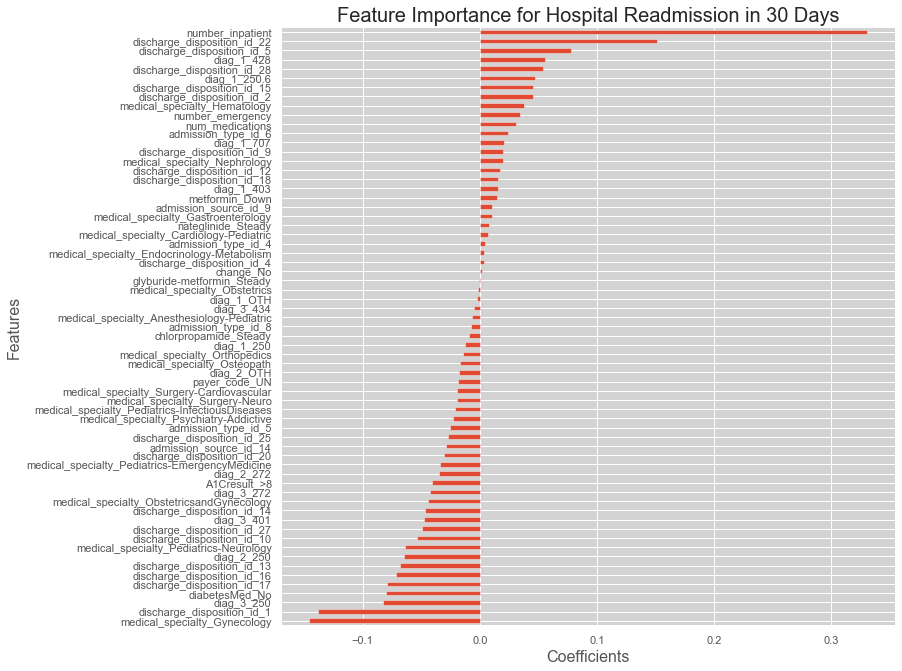

In [78]:
## Feature Importance based on the balanced model. 
coeffs = lr2_model_new.coef_.tolist()
column_names = X_new.columns.tolist()
plt.style.use('ggplot')
weights = pd.Series(coeffs[0],index=column_names).sort_values(ascending=True)
plt.figure(figsize=(11,11))
weights.plot(kind='barh').patch.set_facecolor('lightgrey')
plt.ylabel("Features", fontsize=16)
plt.xlabel("Coefficients", fontsize=16)
plt.title('Feature Importance for Hospital Readmission in 30 Days', fontsize=20)
plt.show()

### 4   Conclusion

Based on the confusion matrix, we lean on the balanced option of *class_weight* to get us a model that is not completely biased toward predicting against re-admission, though optimization to any specific desired balance of sensitivity, precision, accuracy, etc is somewhat difficult with *sklearn*, and the application of such tuning would depend on the specific desired outcome of the user of the model. This optimization would be based on whether it is more prudent for the stakeholder to predict more heavily toward high risk for re-admission with a high number of false positives, or the opposite, resulting in patients potantially being released with a high probability of returning within 30 days. Based on our results, a threshold value of .17 optimizes the model for precision vs recall. This can also be achieved with a threshold value of .63 when the *class_weight = 'balanced'* option is used.

The final model using the *class_weight = 'balanced'* option was decidedly our best model, in that it provided an increase to the sensitivity that captures more tendency toward prediciting a readmission within thirty days. Given the limitation of Sklearn’s logistic regression function (namely, the difficulty in leveraging the threshold for classification), we believed another binary classifier could achieve better results that can more effectively solve the problem.

### Appendix:   Code

#### Data Import

In [3]:
# !pip install plot-metric

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [5]:
#import data and create dataframe:
df_raw = pd.read_csv("https://raw.githubusercontent.com/jteysen/QTW/main/Data/diabetic_data.csv")
#view the head of the dataframe
df_raw.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
df_raw.shape

(101766, 50)

In [7]:
#show variable types
df_raw.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [8]:
#summary stats (numeric variables only)
df_raw.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


#### Initial Data Cleanup

Exploration and decisions involving data cleanup were performed using the tables above and opening the data in an Excel spreadsheet and visually inspecting it. There are some columns that are purely for identification that will not be necessary for modeling; these can be removed. The *examide* and *citoglipton* features have the same value ("No") for all observations those can be removed as well.

In [9]:
#drop useless columns
df = df_raw.drop(['encounter_id', 'patient_nbr', 'examide', 'citoglipton'], axis = 1)

The response variable "readmitted" is split into three possible outcomes in the data set, but we are only interested in hospital readmissions within 30 days, so this will be recategorized as 1 or 0 with 1 indicating a readmission in 30 days and 0 replacing the current values of both "NO" and ">30".

In [10]:
#replace values of targets
df['readmitted'] = df['readmitted'].replace(['>30'],0)
df['readmitted'] = df['readmitted'].replace(['NO'],0)
df['readmitted'] = df['readmitted'].replace(['<30'],1)
#check replaced values
# df['readmitted'].head(20)
# df.groupby('readmitted').count()

It first must be determined which features are categorical and should be one-hot encoded, and which are ordinal (with some that might need adjustment to be numeric) or continuous.

*Age* is an obvious oridinal variable that is provided in ten year age groups that needs to be changed from an object Dtype to int64 for an easy ordinal variable.

In [11]:
#change age groups - will just use 1 to 10 (where 1 is [0-10 years], 2 is [10-20 years],...10 is [90-100 years])
df['age'] = df['age'].replace(['[0-10)'],1)
df['age'] = df['age'].replace(['[10-20)'],2)
df['age'] = df['age'].replace(['[20-30)'],3)
df['age'] = df['age'].replace(['[30-40)'],4)
df['age'] = df['age'].replace(['[40-50)'],5)
df['age'] = df['age'].replace(['[50-60)'],6)
df['age'] = df['age'].replace(['[60-70)'],7)
df['age'] = df['age'].replace(['[70-80)'],8)
df['age'] = df['age'].replace(['[80-90)'],9)
df['age'] = df['age'].replace(['[90-100)'],10)
#check replaced values
df['age'].head(20)

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10     5
11     7
12     5
13     9
14     7
15     7
16     6
17     6
18     8
19     8
Name: age, dtype: int64

#####  Diag Codes Transformation

We have three diagnosis code columns in the data set - diag_1, diag_2, and diag_3. The values in these columns represent codes for specific diagnosis (e.g., 250.6 - Diabetes with neurological manifestations). There are quite a number of different diagnosis codes in the data set, and using them for modeling as-is will result in thousands one-hot encoded features and add enormous time to the modeling process. As such, we will need to transform these columns to a manageable set of values.

For this, we will look at the distribution of readmits by each of the diagnosis codes and assess if that is significantly different from the overall distribution of the readmits. This will help us asses which specific diagnosis codes potentially have a significance on the readmission, and retain them as-is. We will set the rest of them to a default value (like 'OTH').

In [12]:
# first get the overall readmits percent
overall_readm_pct = df[df['readmitted'] == 1]['readmitted'].count() / len(df['readmitted'])
print('Overall readmissions percent:', overall_readm_pct)

Overall readmissions percent: 0.11159915885462728


In [13]:
#this function obtains percents of readmissions by the given categorical column values
#and returns a DF with that information; we will use this multiple times to assess
#distribution of target by the three diagnosis code columns
def get_readm_pivot(colname):
    #create a data frame with readmission count by medical specialty
    df_pivot = df.groupby(colname)['readmitted'].value_counts().reset_index(name='count')
    #lets add total count by colname to calculate the percent of readmissions
    TempDF = df_pivot.groupby(by=[colname])['count'].sum()
    TempDF = TempDF.reset_index(name='total_col_cnt') 
    df_pivot = pd.merge(df_pivot, TempDF, how='inner', on=colname)
    #also add total count to get total percent of records by diag 1
    #this is the look at both readmission percent as well as overall percent
    #to assess if any diag 1s are significant
    df_pivot['total_cnt'] = df_pivot['count'].sum()
    df_pivot['col_pct'] = df_pivot['count'] / df_pivot['total_col_cnt']
    df_pivot['total_pct'] = df_pivot['total_col_cnt'] / df_pivot['total_cnt']
    del(TempDF)
    return df_pivot

In [14]:
#get distribution of target variable bu diag_1 values
df_d1 = get_readm_pivot('diag_1')
#now filter records for readmission only
df_d1 = df_d1[df_d1['readmitted'] == 1]

In [15]:
#now look at largest 20 readmissions where percent is greater than overall percent
df_d1[(df_d1['col_pct'] > overall_readm_pct) & (df_d1['total_pct'] > 0.01)].nlargest(20, 'col_pct')

,diag_1,readmitted,count,total_col_cnt,total_cnt,col_pct,total_pct
191,250.6,1,219,1183,101766,0.185123,0.011625
461,434,1,329,2028,101766,0.162229,0.019928
949,820,1,171,1082,101766,0.158041,0.010632
449,428,1,968,6862,101766,0.141067,0.067429
232,276,1,257,1889,101766,0.136051,0.018562
1139,V57,1,163,1207,101766,0.135046,0.011861
670,577,1,142,1057,101766,0.134342,0.010387
1114,996,1,264,1967,101766,0.134215,0.019329
682,584,1,202,1520,101766,0.132895,0.014936
545,491,1,287,2275,101766,0.126154,0.022355


In [16]:
#now look at smallest 20 readmissions where percent is less than overall percent
df_d1[(df_d1['col_pct'] < overall_readm_pct) & (df_d1['total_pct'] > 0.01)].nsmallest(20, 'col_pct')

,diag_1,readmitted,count,total_col_cnt,total_cnt,col_pct,total_pct
895,786,1,291,4016,101766,0.072460,0.039463
538,486,1,314,3508,101766,0.089510,0.034471
790,682,1,183,2042,101766,0.089618,0.020066
425,414,1,595,6581,101766,0.090412,0.064668
447,427,1,252,2766,101766,0.091106,0.027180
549,493,1,98,1056,101766,0.092803,0.010377
883,780,1,191,2019,101766,0.094601,0.019840
580,518,1,110,1115,101766,0.098655,0.010957
829,715,1,215,2151,101766,0.099954,0.021137
418,410,1,373,3614,101766,0.103210,0.035513


In [17]:
#based on the above results, asses the codes to retain as-is;
#for this we will use the threshold > 14% or < 8%;
diag1s_to_retain = ['250.6', '434', '820', '428', '786']

In [18]:
#get distribution of target variable by diag_2 values
df_d2 = get_readm_pivot('diag_2')
#now filter records for readmission only
df_d2 = df_d2[df_d2['readmitted'] == 1]

In [19]:
#now look at largest 20 readmissions where percent is greater than overall percent
df_d2[(df_d2['col_pct'] > overall_readm_pct) & (df_d2['total_pct'] > 0.01)].nlargest(20, 'col_pct')

,diag_2,readmitted,count,total_col_cnt,total_cnt,col_pct,total_pct
384,403,1,429,2823,101766,0.151966,0.027740
638,585,1,272,1871,101766,0.145377,0.018385
751,707,1,285,1999,101766,0.142571,0.019643
724,682,1,190,1433,101766,0.132589,0.014081
512,491,1,201,1545,101766,0.130097,0.015182
124,250.01,1,196,1523,101766,0.128693,0.014966
423,428,1,842,6662,101766,0.126388,0.065464
417,425,1,175,1434,101766,0.122036,0.014091
214,276,1,810,6752,101766,0.119964,0.066348
636,584,1,190,1649,101766,0.115221,0.016204


In [20]:
#now look at smallest 20 readmissions where percent is less than overall percent
df_d2[(df_d2['col_pct'] < overall_readm_pct) & (df_d2['total_pct'] > 0.01)].nsmallest(20, 'col_pct')

,diag_2,readmitted,count,total_col_cnt,total_cnt,col_pct,total_pct
380,401,1,268,3736,101766,0.071734,0.036712
122,250,1,446,6071,101766,0.073464,0.059656
400,414,1,220,2650,101766,0.083019,0.026040
398,413,1,87,1042,101766,0.083493,0.010239
232,285,1,141,1520,101766,0.092763,0.014936
394,411,1,249,2566,101766,0.097038,0.025215
825,780,1,147,1491,101766,0.098592,0.014651
547,518,1,138,1355,101766,0.101845,0.013315
415,424,1,110,1071,101766,0.102708,0.010524
506,486,1,142,1379,101766,0.102973,0.013551


In [21]:
#threshold > 14% or < 8%;
diag2s_to_retain = ['403', '585', '707', '401', '250']

In [22]:
#get distribution of target variable by diag_3 values
df_d3 = get_readm_pivot('diag_3')
#now filter records for readmission only
df_d3 = df_d3[df_d3['readmitted'] == 1]

In [23]:
#now look at largest 20 readmissions where percent is greater than overall percent
df_d3[(df_d3['col_pct'] > overall_readm_pct) & (df_d3['total_pct'] > 0.01)].nlargest(20, 'col_pct')

,diag_3,readmitted,count,total_col_cnt,total_cnt,col_pct,total_pct
169,250.6,1,192,1080,101766,0.177778,0.010613
660,585,1,336,1992,101766,0.168675,0.019574
407,403,1,385,2357,101766,0.163343,0.023161
782,707,1,202,1360,101766,0.148529,0.013364
542,496,1,350,2605,101766,0.134357,0.025598
134,250.02,1,180,1369,101766,0.131483,0.013452
683,599,1,239,1941,101766,0.123132,0.019073
445,428,1,560,4577,101766,0.122351,0.044976
223,276,1,603,5175,101766,0.116522,0.050852
443,427,1,459,3955,101766,0.116056,0.038864


In [24]:
#now look at smallest 20 readmissions where percent is less than overall percent
df_d3[(df_d3['col_pct'] < overall_readm_pct) & (df_d3['total_pct'] > 0.01)].nsmallest(20, 'col_pct')

,diag_3,readmitted,count,total_col_cnt,total_cnt,col_pct,total_pct
1062,?,1,91,1423,101766,0.063949,0.013983
215,272,1,135,1969,101766,0.068563,0.019348
403,401,1,688,8289,101766,0.083002,0.081452
130,250,1,984,11555,101766,0.085158,0.113545
423,414,1,338,3664,101766,0.092249,0.036004
1204,V45,1,132,1389,101766,0.095032,0.013649
437,424,1,109,1063,101766,0.102540,0.010446
241,285,1,127,1200,101766,0.105833,0.011792


In [25]:
#threshold > 14% or < 8%;
diag3s_to_retain = ['250.6', '585', '403', '707', '272']

In [26]:
#now combine all the diag codes to reatin and get distinct list
diags_to_retain = list(set(diag1s_to_retain + diag2s_to_retain + diag3s_to_retain))
print('Diags to be reatined as is:', diags_to_retain)

Diags to be reatined as is: ['585', '428', '707', '820', '401', '434', '250.6', '786', '403', '272', '250']


In [27]:
#now let us update the three columns to transform values
df['diag_1'] = np.where(df['diag_1'].isin(diags_to_retain), df['diag_1'], 'OTH')
df['diag_2'] = np.where(df['diag_2'].isin(diags_to_retain), df['diag_2'], 'OTH')
df['diag_3'] = np.where(df['diag_3'].isin(diags_to_retain), df['diag_3'], 'OTH')

##### Assess Readmissions distribution by Race

There are ethical concerns with using race as one of the predictors for identifying readmissions. Let us look at the distribution of readmissions for different races. If there is a significant deviation in the distribution for any specific race(s), we are bettter off leaving race out of the feature set.

In [28]:
df_race = get_readm_pivot('race')
df_race[df_race['readmitted'] == 1]

,race,readmitted,count,total_col_cnt,total_cnt,col_pct,total_pct
1,?,1,188,2273,101766,0.082710,0.022336
3,AfricanAmerican,1,2155,19210,101766,0.112181,0.188766
5,Asian,1,65,641,101766,0.101404,0.006299
7,Caucasian,1,8592,76099,101766,0.112906,0.747784
9,Hispanic,1,212,2037,101766,0.104075,0.020017
11,Other,1,145,1506,101766,0.096282,0.014799


From the above result, we can see that there are no significant deviations against the overall readmissions rate (~11%) for any specific classes of race. As such, we can include it in the modeling process.

In [29]:
#verify in excel
#df.to_csv('data_check.csv')

#### Dealing with Missing Information - Discovery

We can tell from the 'head' output and viewing this data in Excel that missing values are denoted with a '?'. We will have to replace these with filler data in the columns with missing data. First, the '?' are replaced with null values so we can use the *missingno* package to analyze the missing data.

In [30]:
df = df.replace('?', np.nan)
df.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,1,NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,2,NaN,1,1,7,3,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,AfricanAmerican,Female,3,NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,Male,4,NaN,1,1,7,2,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,Caucasian,Male,5,NaN,1,1,7,1,NaN,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,0


The bar matrix below represents the entire data frame and the white spaces show where data is missing.

<AxesSubplot:>

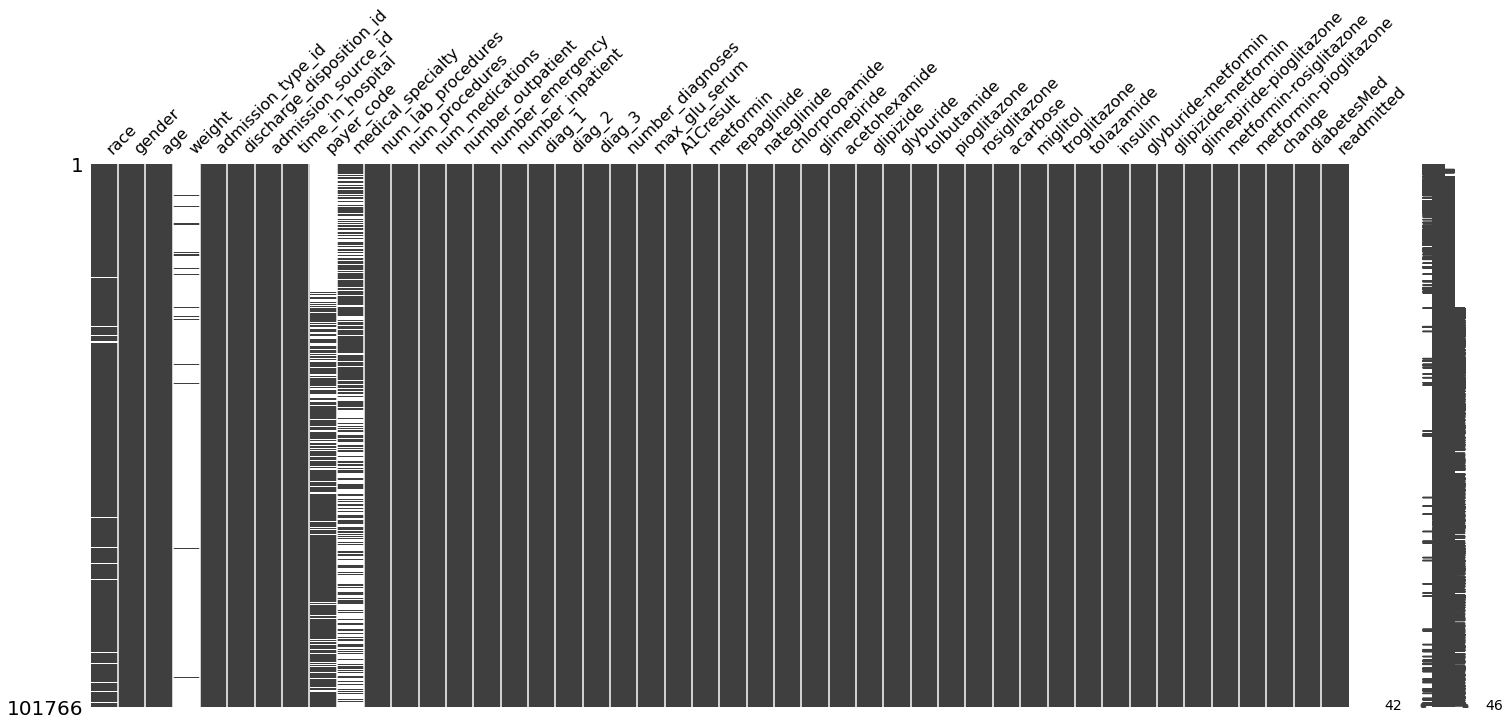

In [31]:
msno.matrix(df)

This is the number of values present in the missing value columns:
1. weight : 3197 (too low)
2. medical speciality : 51817
3. payer code : 61510
4. race : 99493

The bar chart below shows counts of how many rows are populated with data in each column, and is sorted by showing the columns with the most missing data first.

<AxesSubplot:>

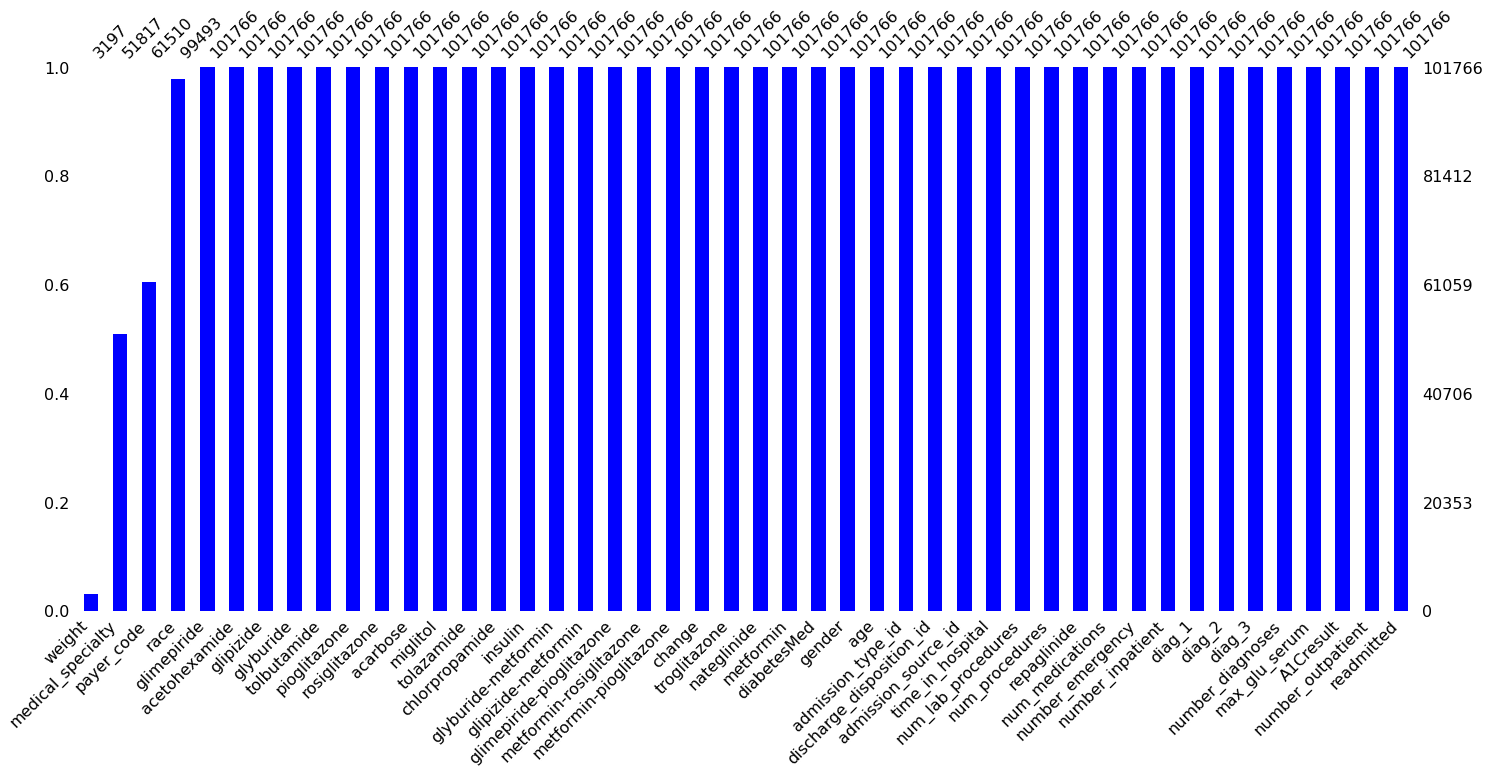

In [32]:
print("")
msno.bar(df, sort="ascending", color="blue")

It can be clearly seen from both charts that the main areas of concern with missing data are in the *weight*, *medical_specialty*, and *payer_code* features, while another 4 features are lacking in just a few entries. Unfortunately the data set appears to be almost completely devoid of any *weight* information, so imputing this data from the extremely limited amount provided would not be sound practice. The more prudent option is to drop the feature.

In [33]:
df = df.drop(['weight'], axis = 1)

Below is a heatmap of showing nullity correlation between the features with missing data. If any of these nullity correlations were particularly high, we could identify patterns in features that are missing data depending on the availability of data in other features.

<AxesSubplot:>

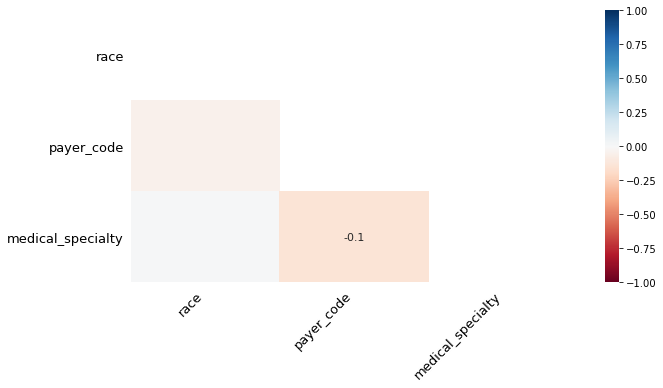

In [34]:
msno.heatmap(df, figsize=(10,5), fontsize=13)

We can also look at similarities between some of the categorical features that are missing data with others that might intuitively have some relationship with them, that way we can use that relationship to fill in the missing data. We view this information with a heat map.

' the payer_code shows the highest similarity with the age and the medical_speciality shows the highest similarity \nwith the admission type'

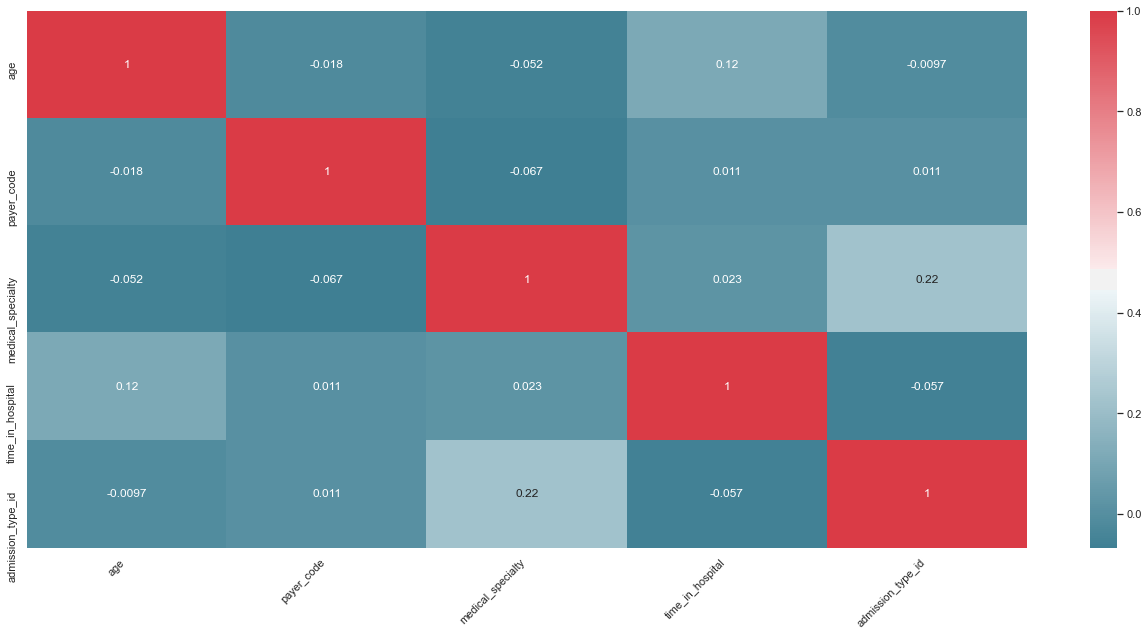

In [35]:
## find other variables which may be used fill na values for payercodes and medical speciality

df_payermedsp = df[['age','payer_code','medical_specialty','time_in_hospital','admission_type_id']]

## transforming to ordinal values and calculate similarity among payercode, medical speciality, age, timeinhospital and admission type
## remove missing values to calculate correlation, which is sort of cosine similarity
df_payermedsp = df_payermedsp[['age','payer_code','medical_specialty','time_in_hospital','admission_type_id']].dropna()
enc = OrdinalEncoder()
df_payermedsp[['age','payer_code','medical_specialty']] = enc.fit_transform(df_payermedsp[['age','payer_code','medical_specialty']])

## normalizing the values
df_norm = (df_payermedsp - df_payermedsp.mean()) / (df_payermedsp.max() - df_payermedsp.min())

cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

# show the heatmap
sns.set(style="darkgrid") # one of the many styles to plot using
f, ax = plt.subplots(figsize=(18, 9))
chart=sns.heatmap(df_norm.corr(), cmap=cmap, annot=True)
chart.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
f.tight_layout()

''' the payer_code shows the highest similarity with the age and the medical_speciality shows the highest similarity 
with the admission type'''

We see above that none of the variables have a significant enough relationship with *payer_code* to use for imputation based on correlation. There is a small similarity (.22) between *medical_specialty* and *admission_type_id* that could potentially be useful.

#### Dealing with Missing Information - Imputation

We discussed that *weight* would be dropped from our dataframe as 97% of the data is missing; The feature with the next highest amount of missing data is *medical_specialty*. This is a particularly difficult categorical variable to impute as nearly half of the data is missing and we don't know if this feature will be at all important to the prediction model. Because there is some small similarity with *admission_type_id*, we could try to use that to impute values for *medical_specialty*. 

In [36]:
#show the most common categories for medical_specialty
df['medical_specialty'].value_counts(sort=True, ascending=False, normalize=True)

InternalMedicine          0.282436
Emergency/Trauma          0.145995
Family/GeneralPractice    0.143582
Cardiology                0.103287
Surgery-General           0.059807
                            ...   
Speech                    0.000019
Perinatology              0.000019
Psychiatry-Addictive      0.000019
SportsMedicine            0.000019
Proctology                0.000019
Name: medical_specialty, Length: 72, dtype: float64

In [37]:
print('Even though admission_type_id has the highest similarity with the medical speciality, we could not use it as group 7 of admission_type_id has no corresponding value of medical_specialty')

df.groupby("admission_type_id")['medical_specialty'].count() ## therefore, no median can be obtained

Even though admission_type_id has the highest similarity with the medical speciality, we could not use it as group 7 of admission_type_id has no corresponding value of medical_specialty


admission_type_id
1    20745
2    12995
3    12103
4        2
5     1757
6     3931
7        0
8      284
Name: medical_specialty, dtype: int64

I looks like the *admission_type_id* are have some values with all or nearly all of the *medical_specialty* feature missing, so trying to use a correlation between them would not be very valuable over simpler methods. It might be better fo now to randomize the top four categories of *medical_specialty*.

In [38]:
## filled the missing values by randoming assigning values drawn from top 4 categories of medical specialty
import random
df['medical_specialty'].fillna(random.choice(['InternalMedicine', 'Emergency/Trauma', 'Family/GeneralPractice', 'Cardiology']), inplace=True)

#check
print("Any missing values for medical_specialty:- ", df["medical_specialty"].isnull().values.any())
## now no missing values

Any missing values for medical_specialty:-  False


In [39]:
#another option for experimentation - simply replace NAs with the mode - 'InternalMedicine'
#df['medical_specialty'] = df['medical_specialty'].fillna(df['medical_specialty'].mode())

The next feature for imputation is *payer_code*. Based on research into this feature, it appears that age could be a good factors to use to impute the payer codes based on the mode for each age group.

In [40]:
# #show what the most common categories are
# df['payer_code'].value_counts(sort=True, ascending=False, normalize=True)

In [41]:
## Using age group to fill the missing values of payer codes 
df["payer_code"] = df.groupby("age").transform(lambda x: x.fillna(x.mode().iloc[0]))['payer_code'] 

print('Unique values: ', df["payer_code"].unique()) ## no missing values
print("Any missing values for payer_code:- ", df["payer_code"].isnull().values.any())

Unique values:  ['BC' 'MD' 'HM' 'MC' 'UN' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
Any missing values for payer_code:-  False


In [42]:
# print('Even though admission_type_id has the highest similarity with the medical speciality, we could not use it as group 7 of admission_type_id has no corresponding value of medical_specialty')

# df.groupby("admission_type_id")['medical_specialty'].count() ## therefore, no median can be obtained

The second highest similarity to *medical_specialty* was *time_in_hospital*, and this was used to impute the missing values there as a slight step up from imputing them randomly.

In [43]:
## So we are using the second highest similarity time_in_hospital variable to fill the missing values of medical speciality

df["medical_specialty"] = df.groupby("time_in_hospital").transform(lambda x: x.fillna(x.mode().iloc[0]))['medical_specialty'] 
print("Any missing values for medical_specialty:- ", df["medical_specialty"].isnull().values.any())

Any missing values for medical_specialty:-  False


Another feature with missing data that needs imputing is *race*.

In [44]:
#show the most common categories for 'race'
df['race'].value_counts(sort=True, ascending=False, normalize=True)

Caucasian          0.764868
AfricanAmerican    0.193079
Hispanic           0.020474
Other              0.015137
Asian              0.006443
Name: race, dtype: float64

We won't know if this information has value in the prediction model until we try to run it, and it may be an odd practice to impute this particular feature with the mode, as there are some potential ethical concerns with how this variable could be used and we would want to take extra care to not create any artificial trends. However, the amount of missing data in this category is fairly insignificant and it likely won't make any difference to the model performance with whatever we do to it. It may be best to randomly assign the missing values for the purpose of model building, as this should not skew any of the categories or create any artificial trends.

In [45]:
## filled the missing value of race by randoming assigning values drawn from other available values
import random
df['race'].fillna(random.choice(df['race'][df['race'].notna()]), inplace=True)

print(df["race"].unique()) ## now no missing values
print("Any missing values for race:- ", df["race"].isnull().values.any())

['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']
Any missing values for race:-  False


In [47]:
#verify in excel
#df.to_csv('data_check.csv')

#### One-Hot Encoding

The provided ID_mapping information tells us that the *admission_type_id*, *discharge_disposition_id*, and *admission_source_id* features are actually categorical with dummy variables with a metadata file describing them, so these will need to be one-hot encoded as they are not ordinal as they appear.

The lists below show which features from the data set are one-hot encoded, and which are left alone (post-initial cleanup). Note that some of the "categorical" variables that will be one-hot encoded appear that they could possibly be assigned ordinal values based on their appearances of 'increasing' in value, but without specific domain knowledge of these features it is difficult to make this assumption in most cases. 

| One-hot Encoded | Numeric |
| --- | --- |
| race | age |
| gender | time_in_hospital |
| admission_type_id | num_lab_procedures |
| discharge_disposition_id | num_procedures |
| admission_source_id | num_medications |
| payer_code | number_outpatient |
| medical_specialty | number_emergency |
| max_glu_serum | number_inpatient |
| A1Cresult | number_diagnoses |
| metformin |
| repaglinide |
| nateglinide |
| chlorpropamide |
| glimepiride |
| acetohexamide |
| glipizide |
| glyburide |
| tolbutamide |
| pioglitazone |
| rosiglitazone |
| acarbose |
| miglitol |
| troglitazone |
| tolazamide |
| insulin |
| glyburide-metformin |
| glipizide-metformin |
| glimepiride-pioglitazone |
| metformin-rosiglitazone |
| metformin-pioglitazone |
| change |
| diabetesMed |
| diag_1 |
| diag_2 |
| diag_3 |

The code below one-hot encodes the relevant features listed above.

In [48]:
# Create new one-hot encoded features using pandas.get_dummies
# from https://datagy.io/pandas-get-dummies/
categorical_columns = ['race',  'gender',  'admission_type_id',  'discharge_disposition_id',  'admission_source_id',  'payer_code',  'medical_specialty',  
                       'max_glu_serum',  'A1Cresult',  'metformin',  'repaglinide',  'nateglinide',  'chlorpropamide',  
                       'glimepiride',  'acetohexamide',  'glipizide',  'glyburide',  'tolbutamide',  'pioglitazone',  'rosiglitazone',  'acarbose',  
                       'miglitol',  'troglitazone',  'tolazamide',  'insulin',  'glyburide-metformin',  'glipizide-metformin',  
                       'glimepiride-pioglitazone',  'metformin-rosiglitazone',  'metformin-pioglitazone',  'change',  'diabetesMed', 'diag_1', 'diag_2', 'diag_3']

for column in categorical_columns:
    tempdf = pd.get_dummies(df[column], prefix=column)
    df = pd.merge(
        left=df,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    df = df.drop(columns=column)
df.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,...,diag_3_272,diag_3_401,diag_3_403,diag_3_428,diag_3_434,diag_3_585,diag_3_707,diag_3_786,diag_3_820,diag_3_OTH
0,1,1,41,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2,3,59,0,18,0,0,0,9,0,...,0,0,0,0,0,0,0,0,0,1
2,3,2,11,5,13,2,0,1,6,0,...,0,0,0,0,0,0,0,0,0,1
3,4,2,44,1,16,0,0,0,7,0,...,0,0,1,0,0,0,0,0,0,0
4,5,1,51,0,8,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
#verify in excel
# df.to_csv('data_check2.csv')

#### Logisitic Regression Model

* L1 and L2 regularization
* tune for C
* try to use class weights to see if it changes model accuracy - the target class is unbalanced about 90/10

In [50]:
## X for explanatory variables and y for the response variable
y = df['readmitted']
X = df.drop('readmitted', axis=1)
print('Size of target vector: ', y.shape)
print('='*50)
print('Size of explanatory matrix: ',X.shape)

Size of target vector:  (101766,)
Size of explanatory matrix:  (101766, 274)


In [51]:
## counting unique values of targets 
print("split between 0 and 1 of binary classes:  \n", '-----------------')
print(y.value_counts())
'''The data looks a bit unbalanced (89:11 split). So, we will use StratifiedKFold to create test and train data'''

split between 0 and 1 of binary classes:  
 -----------------
0    90409
1    11357
Name: readmitted, dtype: int64


'The data looks a bit unbalanced (89:11 split). So, we will use StratifiedKFold to create test and train data'

In [52]:
## Creating training and test data using StratifiedKFold
from sklearn.model_selection import StratifiedKFold, KFold

cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=21)

for train, test in cv.split(X,y):
    X_train = X.iloc[train] 
    X_test  = X.iloc[test] 
    y_train = y[train]
    y_test  = y[test] 

In [53]:
# Standardize the feature
from sklearn.preprocessing import StandardScaler #for scaling
X_train= StandardScaler().fit_transform(X_train)
X_test= StandardScaler().fit_transform(X_test)

The code below is for tuning the hyperparameter *C* - the regularization strength. Decreasing *C* will increase the amount of regularization on the model parameters. After initial experimentation, it was determined the the optimal value for *C* for this model would be somewhere between .1 and 1, and the final step of finding this best value is shown below.

In [54]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score as cv
from sklearn import metrics as mt

#   here we can setup the object with different learning parameters and constants
print("C and Accuracy \n", "--------------------" ) 
for i in np.arange(0.1, 1.1, 0.1):  
    accu = []
    Logistic_l1_model = LogisticRegression(penalty='l1', solver='liblinear', C = i, random_state = 25).fit(X_train, y_train)
    accuracies = cross_val_score(Logistic_l1_model, X_test, y=y_test) 
    accu.append(accuracies)
    t = 0   
    l = len(accu[0])
    for a in accu[0]:        
        t = t + a              
#     print("C and Accuracy \n", "--------------------" )        
    print('C: ', round(i,2),  ' | ', 'Accuracy: ', round((t/l),4))



C and Accuracy 
 --------------------
C:  0.1  |  Accuracy:  0.8869
C:  0.2  |  Accuracy:  0.8843
C:  0.3  |  Accuracy:  0.8803
C:  0.4  |  Accuracy:  0.8751
C:  0.5  |  Accuracy:  0.8717
C:  0.6  |  Accuracy:  0.8692
C:  0.7  |  Accuracy:  0.8677
C:  0.8  |  Accuracy:  0.8668
C:  0.9  |  Accuracy:  0.8661
C:  1.0  |  Accuracy:  0.8657
Wall time: 8min 59s


In [55]:
%%time
## so, we will go with C= 0.1 as the accuracy is the lowest at this value
## however, we do not want to overfit and will reducce some dimensions
'''First we will run through L1 , AND then we will do the same with L2'''
'''Strategy is to get the common set of features coming out from these two regularization'''

lr1_model = LogisticRegression(penalty='l1', C=0.1, solver='liblinear', random_state = 25 ) 
lr1_model.fit(X_train,y_train)  # train object
y_hat = lr1_model.predict(X_test) # get test set precitions
# now let's get the accuracy and confusion matrix for the test data
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat) 
print("accuracy", acc )
print("confusion matrix\n",conf)

accuracy 0.8869889937106918
confusion matrix
 [[9010   30]
 [1120   16]]
Wall time: 14.2 s


The below breakdown of the confusion matrix elucidates where our main issue lies when deciding how to optimize the model for hospital re-admissions - the sensitivity (True positive rate) for identifying readmissions within 30 days is exceptionally low, which could be construed as defeating the purpose of creating this model at all. The accuracy is inflated by the fact that the classes are imbalanced - meaning in this case a biased tendency to classify as "0" (not readmitted) will get a high accuracy because of the small number of "1"s (readmitted in 30 days) in the data. In the following steps, a number of attempts are made to regularize the dataset while also exploring options for increasing sensitivity. 

In [56]:
TN = conf[0][0]
FP = conf[0][1]
FN = conf[1][0]
TP = conf[1][1]
print("True Positive: ", TP)
print("True Negative: ", TN)
print("False Positive: ", FP)
print("False Negative: ", FN)
print("Sensitivity (recall/TPR): ", (TP/(TP+FN)))
print("Specificity: ", (TN/(TN+FP)))
print("Precision: ", (TP/(TP+FP)))
print("False Positive Rate: ", (FP/(TP+FP)))

True Positive:  16
True Negative:  9010
False Positive:  30
False Negative:  1120
Sensitivity (recall/TPR):  0.014084507042253521
Specificity:  0.9966814159292036
Precision:  0.34782608695652173
False Positive Rate:  0.6521739130434783


The following code blocks perform the steps of running the model with regularization and subsequent optimization.

In [57]:
## getting the coefficients and names together
weights = lr1_model.coef_.tolist() ## transposing the weights
variable_names = df.columns.tolist()

# Remove all coefficients which are less than 0.01
for coef, name in zip(weights[0],variable_names): 
    if abs(coef) > 0.03:       
        print(name, '  ::  ', coef)    


num_medications   ::   0.05227387877276367
number_emergency   ::   0.034910609688772236
number_inpatient   ::   0.3153796335704372
admission_type_id_4   ::   -0.0369753319632675
admission_type_id_5   ::   0.03416873872137603
admission_type_id_6   ::   -0.03557641576624934
admission_type_id_8   ::   -0.10618907187442267
discharge_disposition_id_1   ::   0.04983670520403066
discharge_disposition_id_2   ::   0.06488617043713778
discharge_disposition_id_4   ::   0.08267635538186628
discharge_disposition_id_10   ::   -0.6438781024676548
discharge_disposition_id_12   ::   -0.0678777287415496
discharge_disposition_id_13   ::   -0.04743927784849131
discharge_disposition_id_14   ::   0.044664127687099035
discharge_disposition_id_16   ::   -0.03153943595285007
discharge_disposition_id_20   ::   0.15094330812748202
discharge_disposition_id_22   ::   -0.043615991235834595
discharge_disposition_id_27   ::   0.05570211719018171
discharge_disposition_id_28   ::   0.03644660992712946
payer_code_UN   :

In [58]:
## getting the coefficients and names together
weights = lr1_model.coef_.tolist() 
variable_names = df.columns.tolist()
names = []
# Remove all coefficients which are less than 0.01
for coef, name in zip(weights[0],variable_names): 
    if abs(coef) > 0.03: 
        names.append(name)
new_l1_features = set(names)
# print(new_l1_features)    


In [59]:
%%time
'''Now we will try with L2 to identify the important features'''
lr2_model = LogisticRegression(penalty='l2', C=0.1, solver='liblinear', random_state = 25 ) 
lr2_model.fit(X_train,y_train)  # train object
y_hat = lr2_model.predict(X_test) # get test set precitions
# now let's get the accuracy and confusion matrix for the test data
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat) 
print("accuracy", acc )
print("confusion matrix\n",conf)
'''Accuracy and Confusion Matrix of L2 are identical to those of L1'''

accuracy 0.8868907232704403
confusion matrix
 [[9009   31]
 [1120   16]]
Wall time: 4.59 s


'Accuracy and Confusion Matrix of L2 are identical to those of L1'

In [60]:
## getting the coefficients and names together
weights2 = lr2_model.coef_.tolist() 
variable_names = df.columns.tolist()

# Remove all coefficients which are less than 0.01
for coef, name in zip(weights2[0],variable_names): 
    if abs(coef) > 0.03:       
        print(name, '  ::  ', coef)    

'''Some features are different '''

num_medications   ::   0.054423041529009474
number_emergency   ::   0.03578726022211016
number_inpatient   ::   0.3146069457545601
admission_type_id_4   ::   -0.03897723745833128
admission_type_id_5   ::   0.03663810746494656
admission_type_id_6   ::   -0.06799146348270357
admission_type_id_8   ::   -0.04063324270536511
discharge_disposition_id_1   ::   0.06947208103427345
discharge_disposition_id_2   ::   0.11201991894843616
discharge_disposition_id_4   ::   0.0978785961735199
discharge_disposition_id_5   ::   0.04394855111108296
discharge_disposition_id_9   ::   -0.043629696269588396
discharge_disposition_id_10   ::   -0.6498165718035189
discharge_disposition_id_12   ::   -0.06171638190576086
discharge_disposition_id_13   ::   -0.04114182573840419
discharge_disposition_id_14   ::   0.04830823420005254
discharge_disposition_id_15   ::   -0.053508668993202696
discharge_disposition_id_16   ::   -0.06013909067915598
discharge_disposition_id_17   ::   0.05034312124453876
discharge_disposi

'Some features are different '

In [61]:
## getting the coefficients and names together
weights2 = lr2_model.coef_.tolist() 
variable_names = df.columns.tolist()
names = []
# Remove all coefficients which are less than 0.01
for coef, name in zip(weights2[0],variable_names): 
    if abs(coef) > 0.03: 
        names.append(name)
new_l2_features = set(names)
# print(new_l2_features)   

In [62]:
'''Taking the union of l1 and l2 features'''
new_combined_features = list(new_l2_features.union(new_l1_features))
print(new_combined_features)

['diag_3_250', 'metformin_Down', 'discharge_disposition_id_13', 'chlorpropamide_Steady', 'discharge_disposition_id_28', 'medical_specialty_Pediatrics-EmergencyMedicine', 'medical_specialty_Gynecology', 'medical_specialty_Osteopath', 'diag_1_OTH', 'discharge_disposition_id_18', 'diag_2_OTH', 'medical_specialty_Gastroenterology', 'admission_type_id_8', 'discharge_disposition_id_27', 'admission_source_id_14', 'discharge_disposition_id_9', 'diag_1_250.6', 'medical_specialty_Surgery-Neuro', 'medical_specialty_Obstetrics', 'diag_1_403', 'diag_1_428', 'medical_specialty_Hematology', 'num_medications', 'change_No', 'medical_specialty_Orthopedics', 'medical_specialty_Endocrinology-Metabolism', 'discharge_disposition_id_10', 'diag_3_272', 'admission_type_id_4', 'discharge_disposition_id_16', 'medical_specialty_Pediatrics-InfectiousDiseases', 'medical_specialty_ObstetricsandGynecology', 'number_inpatient', 'discharge_disposition_id_5', 'discharge_disposition_id_1', 'discharge_disposition_id_22', 

In [63]:
## Create a new dataframe based on the new features 
new_combined_features.append('readmitted')
df_new = df[new_combined_features]
df_new.info()
'''Reduced the dimension to 68 '''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 66 columns):
 #   Column                                           Non-Null Count   Dtype
---  ------                                           --------------   -----
 0   diag_3_250                                       101766 non-null  uint8
 1   metformin_Down                                   101766 non-null  uint8
 2   discharge_disposition_id_13                      101766 non-null  uint8
 3   chlorpropamide_Steady                            101766 non-null  uint8
 4   discharge_disposition_id_28                      101766 non-null  uint8
 5   medical_specialty_Pediatrics-EmergencyMedicine   101766 non-null  uint8
 6   medical_specialty_Gynecology                     101766 non-null  uint8
 7   medical_specialty_Osteopath                      101766 non-null  uint8
 8   diag_1_OTH                                       101766 non-null  uint8
 9   discharge_disposition_id_18          

'Reduced the dimension to 68 '

In [64]:
## X for explanatory variables and y for the response variable
y_new = df_new['readmitted']
X_new = df_new.drop('readmitted', axis=1)
print('Size of target vector: ', y_new.shape)
print('='*50)
print('Size of explanatory matrix: ',X_new.shape)

Size of target vector:  (101766,)
Size of explanatory matrix:  (101766, 65)


In [65]:
## Creating training and test data using StratifiedKFold
from sklearn.model_selection import StratifiedKFold, KFold

cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=21)

for tr, tst in cv.split(X_new,y_new):
    X_train_new = X_new.iloc[tr] 
    X_test_new  = X_new.iloc[tst] 
    y_train_new = y_new[tr]
    y_test_new  = y_new[tst] 

In [66]:
# Standardize the feature
from sklearn.preprocessing import StandardScaler #for scaling
X_train_new = StandardScaler().fit_transform(X_train_new)
X_test_new = StandardScaler().fit_transform(X_test_new)

In [67]:
%%time
#   here we can setup the object with different learning parameters and constants
print("C and Accuracy of new dataset using L2 \n", "--------------------" ) 
for i in np.arange(0.1, 1.1, 0.1):  
    accu = []
    Logistic_l2_model = LogisticRegression(penalty='l2', solver='liblinear', C = i, random_state = 25).fit(X_train_new, y_train_new)
    accuracies = cross_val_score(Logistic_l2_model, X_test_new, y=y_test_new) 
    accu.append(accuracies)
    t = 0   
    l = len(accu[0])
    for a in accu[0]:        
        t = t + a              
#     print("C and Accuracy \n", "--------------------" )        
    print('C: ', round(i,2),  ' | ', 'Accuracy: ', round((t/l),4))

'''Now, we got a stable model, whose accuracy does not vary much with the shrinkage factor'''
'''Also, we can be assured that the model will behave well when it is deployed'''
'''Finally, a remarkable improvement on timing becuase of feature reduction'''

C and Accuracy of new dataset using L2 
 --------------------
C:  0.1  |  Accuracy:  0.8808
C:  0.2  |  Accuracy:  0.8808
C:  0.3  |  Accuracy:  0.8811
C:  0.4  |  Accuracy:  0.8811
C:  0.5  |  Accuracy:  0.8811
C:  0.6  |  Accuracy:  0.8811
C:  0.7  |  Accuracy:  0.8811
C:  0.8  |  Accuracy:  0.8811
C:  0.9  |  Accuracy:  0.8812
C:  1.0  |  Accuracy:  0.8812
Wall time: 12 s


'Finally, a remarkable improvement on timing becuase of feature reduction'

In [68]:
%%time
'''Now we will try with L2 to identify the important features'''
lr2_model_new = LogisticRegression(penalty='l2', C=1, random_state = 25,  solver='liblinear' )
lr2_model_new.fit(X_train_new,y_train_new)  # train object
y_hat_new = lr2_model_new.predict(X_test_new) # get test set precitions
# now let's get the accuracy and confusion matrix for the test data
acc = mt.accuracy_score(y_test_new,y_hat_new)
conf = mt.confusion_matrix(y_test_new,y_hat_new) 
print("accuracy", acc )
print("confusion matrix\n",conf)

accuracy 0.8867924528301887
confusion matrix
 [[9010   30]
 [1122   14]]
Wall time: 1 s


In [69]:
# next up, we will look at precision-recall curve to obtain the threshold
# as our data is imbalanced; before we do so though, we need probabilities
# for our predictions
y_hat_probs_new = lr2_model_new.predict_proba(X_test_new)
y_hat_probs_new = y_hat_probs_new[:, 1]

(0.0, 1.0)

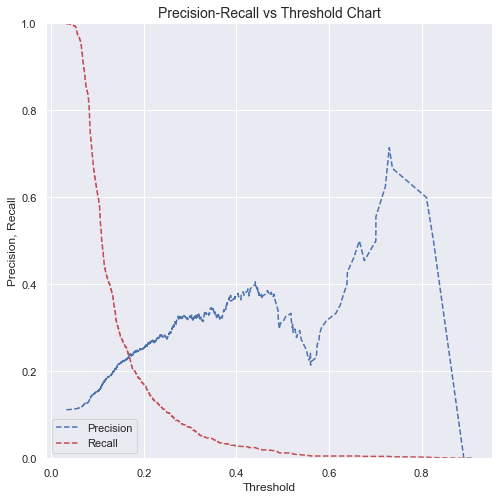

In [70]:
## Predict test_y values and probabilities based on fitted logistic 
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test_new,y_hat_probs_new) 
#    #retrieve probability of being 1(in second column of probs_y)
# pr_auc = mt.auc(recall, precision)
# print(pr_auc)

plt.figure(figsize=(8,8))
plt.title("Precision-Recall vs Threshold Chart", fontsize=14)
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

**The optimum threshold value seems to be about 0.17 as it is the intersection point between the precision and the recall. However, Sklearn Logistic Regression function does not have the parameter to tune the threshold value as opposed to the function available in R. Therefore, we will use the option to balance the classes using the *class_weight* hyperparameter to attempt to mitigate the situation. It is probable that other binary classifiers would be the better option in this case.**

In [71]:
%%time
'''Now we will try with L2 to identify the important features'''
lr2_model_newb = LogisticRegression(penalty='l2', C=1, random_state = 25, class_weight='balanced', solver='liblinear' )
lr2_model_newb.fit(X_train_new,y_train_new)  # train object
y_hat_new = lr2_model_newb.predict(X_test_new) # get test set precitions
# now let's get the accuracy and confusion matrix for the test data
acc = mt.accuracy_score(y_test_new,y_hat_new)
conf = mt.confusion_matrix(y_test_new,y_hat_new) 
print("accuracy", acc )
print("confusion matrix\n",conf)

accuracy 0.6907429245283019
confusion matrix
 [[6490 2550]
 [ 597  539]]
Wall time: 1.17 s


In [72]:
y_hat_probs_bal = lr2_model_newb.predict_proba(X_test_new)
y_hat_probs_bal = y_hat_probs_bal[:, 1]

(0.0, 1.0)

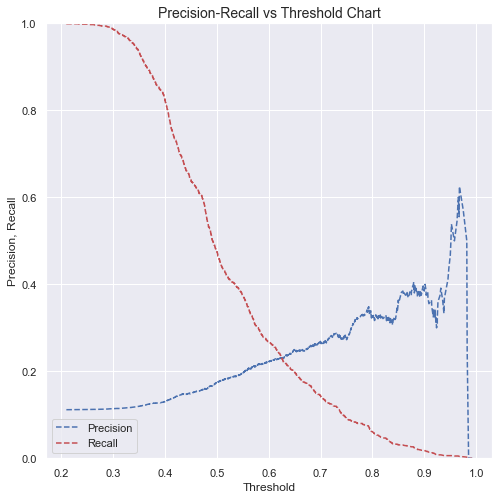

In [73]:
## Predict test_y values and probabilities based on fitted logistic 
precision, recall, thresholds = precision_recall_curve(y_test_new,y_hat_probs_bal ) 

plt.figure(figsize=(8,8))
plt.title("Precision-Recall vs Threshold Chart", fontsize=14)
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

**The balanced option signifies a threshold value of around 0.63 to optimize the precision and the recall. It is the closest we can get from precision-recall optimization standpoint using Sklearn.**

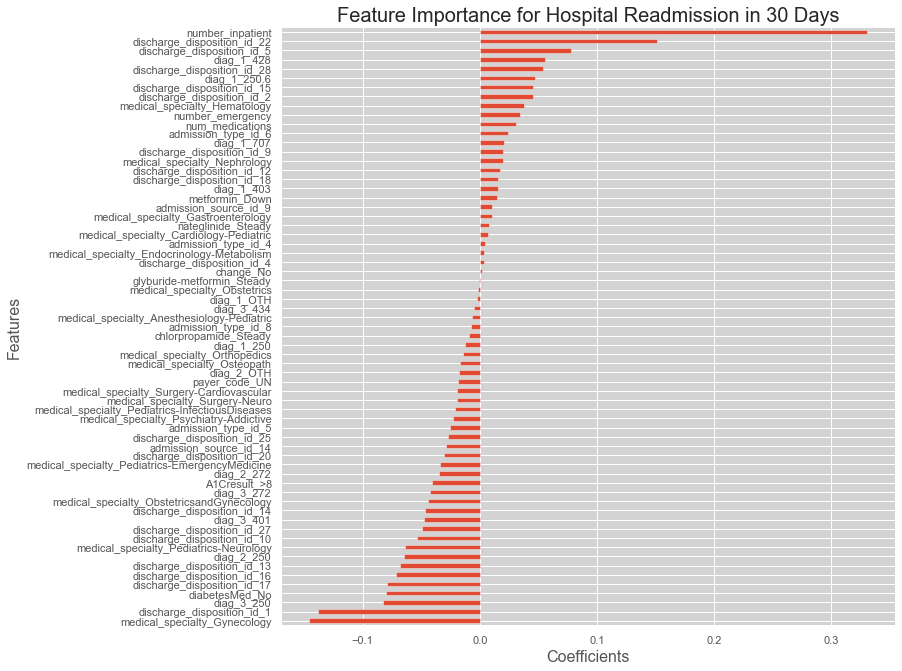

In [74]:
## Feature Importance based on the balanced model. 
coeffs = lr2_model_new.coef_.tolist()
column_names = X_new.columns.tolist()
plt.style.use('ggplot')
weights = pd.Series(coeffs[0],index=column_names).sort_values(ascending=True)
plt.figure(figsize=(11,11))
weights.plot(kind='barh').patch.set_facecolor('lightgrey')
plt.ylabel("Features", fontsize=16)
plt.xlabel("Coefficients", fontsize=16)
plt.title('Feature Importance for Hospital Readmission in 30 Days', fontsize=20)
plt.show()

In [77]:
# p-values and summary statistics 
print("\n=========== SUMMARY ===========")
#!pip install regressors
from regressors import stats
# To calculate the p-values of beta coefficients: 
print("coef_pval:\n", stats.coef_pval(lr2_model_newb, X_train_new, y_train_new))

# xlabels = np.array(X_new.columns)
# print(xlabels)
# stats.summary(lr2_model_new, X_train_new, y_train_new_array, xlabels) 

'''All p-values appear low enough to be comfortable with the included variables'''


=========== SUMMARY ===========
coef_pval:
 [0.00000000e+00 0.00000000e+00 1.77635684e-15 0.00000000e+00
 1.38502834e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00743858e-11 1.42700991e-06 0.00000000e+00 0.00000000e+00
 1.23754340e-11 1.19365871e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.06679149e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.67168406e-02 0.00000000e+00 1.76438696e-01 0.00000000e+00
 0.00000000e+00 6.12129764e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.97909391e-05 0.00000000e+00 5.03553767e-02
 0.00000000e+00 3.22507354e-10 0.00000000e+00 1.40745503e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.47566743e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.12301736e-07 5.73205615e-07 0.0000000

'All p-values appear low enough to be comfortable with the included variables'

### References

[1] American Heart Association. What is Diabetes? https://www.heart.org/en/health-topics/diabetes/about-diabetes

[2] "IDF DIABETES ATLAS Ninth Edition 2019" (PDF). www.diabetesatlas.org. Retrieved 18 May 2020.